## Loan Application Status Prediction

Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

### Importing Liberaries

In [3]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [4]:
#importing data
df=pd.read_csv("E:/Study/loan.csv") #Reading csv file
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Preprocessing and EDA

In [5]:
df.shape

(614, 13)

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


There are some null values in some of the columns and i have to replace those null values.

In [9]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [10]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

LP001907    1
LP002277    1
LP001814    1
LP002990    1
LP002144    1
           ..
LP002692    1
LP001119    1
LP001819    1
LP001256    1
LP001047    1
Name: Loan_ID, Length: 614, dtype: int64
****************************************
Male      489
Female    112
Name: Gender, dtype: int64
****************************************
Yes    398
No     213
Name: Married, dtype: int64
****************************************
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
****************************************
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
****************************************
No     500
Yes     82
Name: Self_Employed, dtype: int64
****************************************
2500    9
6000    6
2600    6
4583    6
4166    5
       ..
5503    1
3450    1
2425    1
2423    1
4095    1
Name: ApplicantIncome, Length: 505, dtype: int64
****************************************
0.0       273
2500.0      5
2083.0      5
1666.0      5
1

Above are the value counts of each column and in LoanID column all the values are unique so no need to keep this column,in CoapplicantIncome column there is about 45% zeros i have to replace that.

In [11]:
#Droping Loan_ID column
df = df.drop(["Loan_ID"],axis=1)

In [12]:
#Checking for skewness
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In [13]:
#Replacing zeros in CoapplicantIncome by median
df["CoapplicantIncome"].replace(0, df["CoapplicantIncome"].median(),inplace = True)

In [14]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,1188.5,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,1188.5,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,1188.5,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,1188.5,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,1188.5,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,1188.5,187.0,360.0,1.0,Urban,Y


In [15]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are some null values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History columns.And i have to replace these null values using imputation technique.

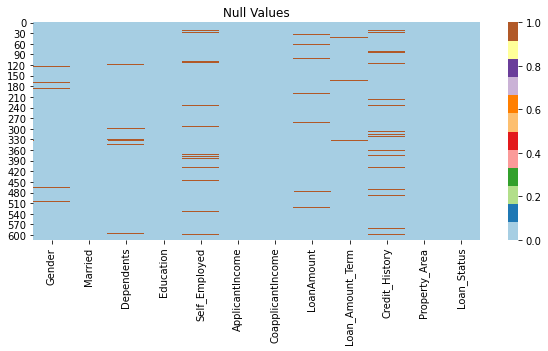

In [16]:
#Visualizeing null values
plt.figure(figsize=[10,4])
sns.heatmap(df.isnull(),cmap="Paired")
plt.title("Null Values")
plt.show()

#### Imputation technique to replace NaN values:

There is skewness in all the numerical column so i can not replace the NaN values with mean i have replace it with median.

In [17]:
#Replacing NaN values in numerical columns
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())

In [18]:
#Replacing null values in categorical columns
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])

In [19]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
#Checking unique values of target column
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [21]:
#Checking for empty observations
df.loc[df['Loan_Status'] == " "]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [22]:
#Checking description of data set
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,2149.683094,145.752443,342.410423,0.855049
std,6109.041673,2682.545729,84.107233,64.428629,0.352339
min,150.000000,16.120001,9.000000,12.000000,0.000000
25%,2877.500000,1188.500000,100.250000,360.000000,1.000000
50%,3812.500000,1199.250000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


The mean value and 2nd quantile value has high difference in almost all the columns which means there is a lot of outliers in all the columns.

The count is same which means no null values.

Minimum loan term is 12.

Minimum loan amount is 9.

#### Data Visualization

Univariate Analysis

In [23]:
# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [24]:
# Now checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


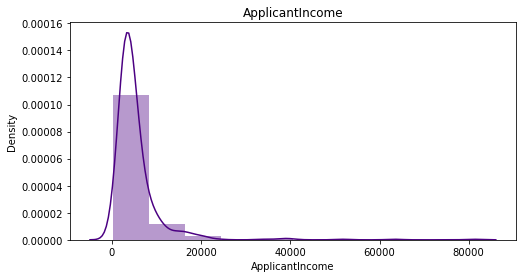

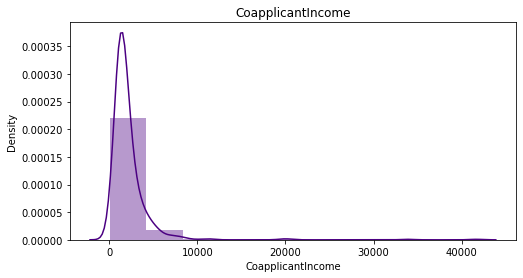

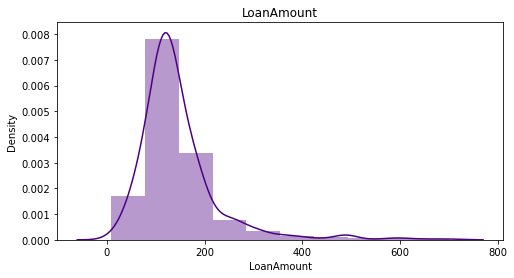

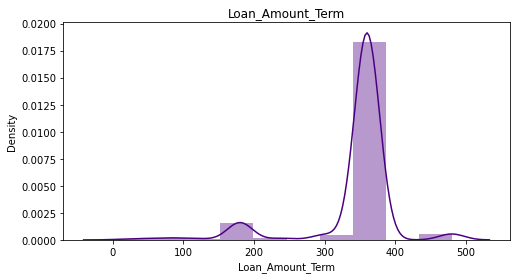

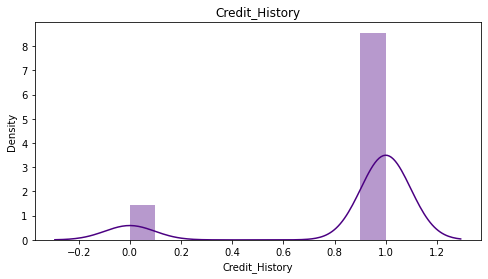

In [25]:
#Distribution plot for all numerical columns
for i in df[numerical_columns]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 10, color="indigo")
    plt.title(i)
    plt.show()

All Numerical values are Skewed

In [26]:
#Checking the value counts of Gender column
df.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

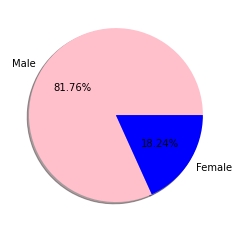

In [27]:
#Ploting pie chart for Gender
labels='Male','Female'
colors = ["pink", "b"]
fig, ax = plt.subplots()
ax.pie(df['Gender'].value_counts(), labels=labels,colors=colors, autopct='%1.2f%%', shadow=True)
plt.show()

Most of the applicants are males

In [28]:
#Checking the value counts of Married column
df.Married.value_counts()

Yes    401
No     213
Name: Married, dtype: int64

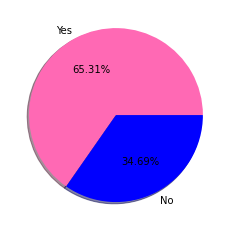

In [29]:
#Ploting pie chart for Married
labels='Yes','No'
colors = ["hotpink", "b"]
fig, ax = plt.subplots()
ax.pie(df['Married'].value_counts(), labels=labels, colors=colors, autopct='%1.2f%%', shadow=True)
plt.show()

Most of the loan applicants are married

In [30]:
#Checking the value counts of Education column
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

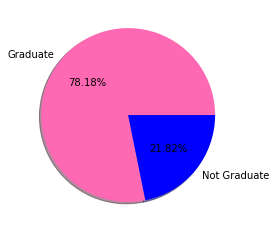

In [31]:
#Ploting pie chart for Education
labels='Graduate','Not Graduate'
colors = ["hotpink", "b"]
fig, ax = plt.subplots()
ax.pie(df['Education'].value_counts(), labels=labels, colors=colors, autopct='%1.2f%%', shadow=True)
plt.show()

Most of the applicants are Graduate

In [32]:
#Checking the value counts of Self_Employed column
df.Self_Employed.value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

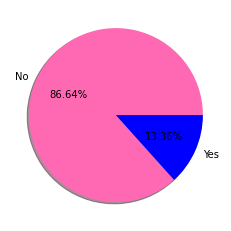

In [33]:
#Ploting pie chart for Self_Employed
labels='No','Yes'
colors = ["hotpink", "b"]
fig, ax = plt.subplots()
ax.pie(df['Self_Employed'].value_counts(), labels=labels, colors=colors, autopct='%1.2f%%', shadow=True)
plt.show()

Most of the applicants are not self employed

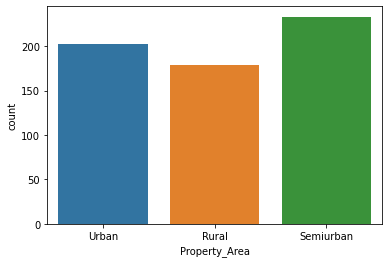

In [34]:
#Count plot for Property_Area
sns.countplot(df['Property_Area']);

Most of the loan applicants are having property in Semiurban are and very less people have property in Rural area.

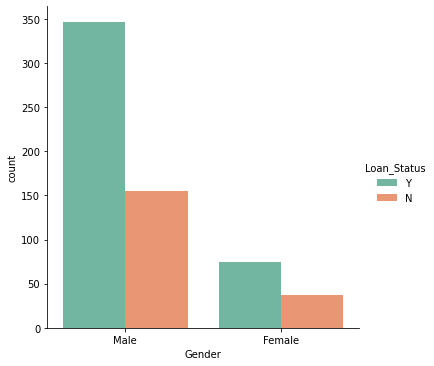

In [35]:
#Factor plot for Gender
sns.factorplot('Gender',kind='count',data=df,hue='Loan_Status',palette="Set2")
plt.xticks(rotation=0);

Male applicants has more chance of getting approved loan.

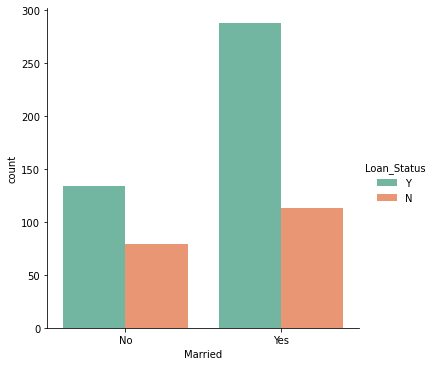

In [36]:
#Factor plot for Married
sns.factorplot('Married',kind='count',data=df,hue='Loan_Status',palette="Set2")
plt.xticks(rotation=0);

Married people has more chance of getting loan approved.

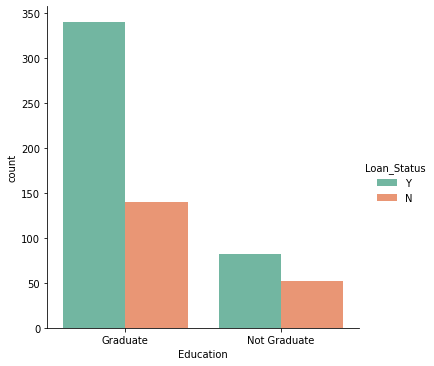

In [37]:
#Factor plot for Education
sns.factorplot('Education',kind='count',data=df,hue='Loan_Status',palette="Set2")
plt.xticks(rotation=0);

Graduated people has more chance of getting loan approved.

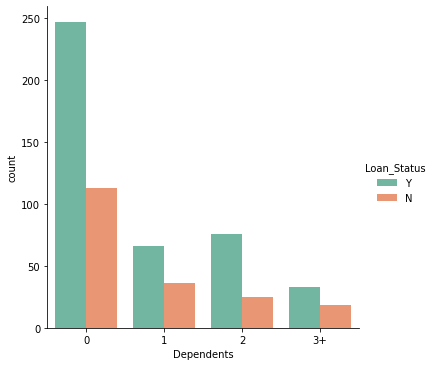

In [38]:
#Factor plot for Dependents
sns.factorplot('Dependents',kind='count',data=df,hue='Loan_Status',palette="Set2")
plt.xticks(rotation=0);

Applicants with 0 dependents has more chance of getting loan approved.

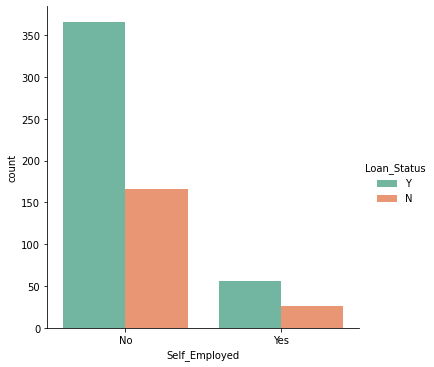

In [39]:
#Factor plot for Self_Employed
sns.factorplot('Self_Employed',kind='count',data=df,hue='Loan_Status',palette="Set2")
plt.xticks(rotation=0);

The applicants who are not self employed has more chance of getting loan approved.

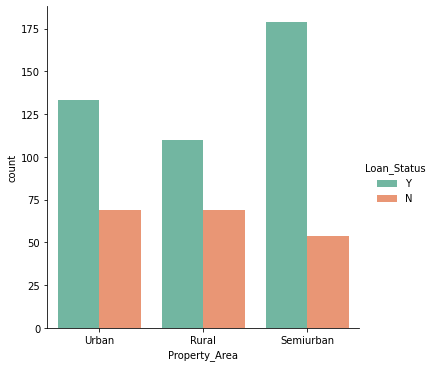

In [40]:
#Factor plot for Property_Area
sns.factorplot('Property_Area',kind='count',data=df,hue='Loan_Status',palette="Set2")
plt.xticks(rotation=0);

Applicants having property in semiurban area has more chance of getting loan approved.

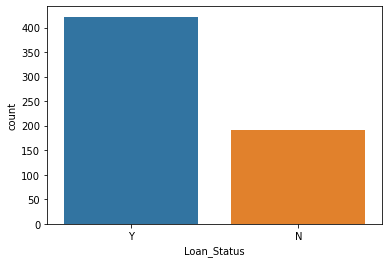

In [41]:
#Count plot for Loan_Status
sns.countplot(df['Loan_Status']);

By looking into the count plot of target column i can say that the data is imbalanced and i need to balance it.

#### Bivariate Analysis

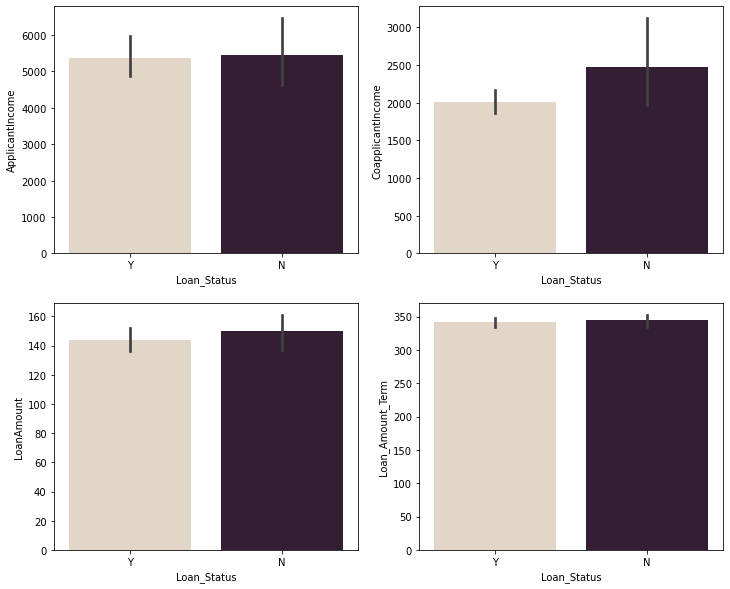

In [42]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

# Checking Loan_Status with ApplicantIncome
sns.barplot(x='Loan_Status',y='ApplicantIncome',ax=axes[0,0],data=df,palette='ch:.25')

# Checking Loan_Status with CoapplicantIncome
sns.barplot(x='Loan_Status',y='CoapplicantIncome',ax=axes[0,1],data=df,palette='ch:.25')

# Checking Loan_Status with LoanAmount
sns.barplot(x='Loan_Status',y='LoanAmount',ax=axes[1,0],data=df,palette='ch:.25')

# Checking Loan_Status with Loan_Amount_Term
sns.barplot(x='Loan_Status',y='Loan_Amount_Term',ax=axes[1,1],data=df,palette='ch:.25')
plt.show()

Based on applicant income the loan status has 50-50 of approval.

If the coapplicant income is about 2000 then the chance is more of getting loan approved.

Loan ammount and loan status also has 50% chance of approval.

For all loan amount term the chance of approval is also same.

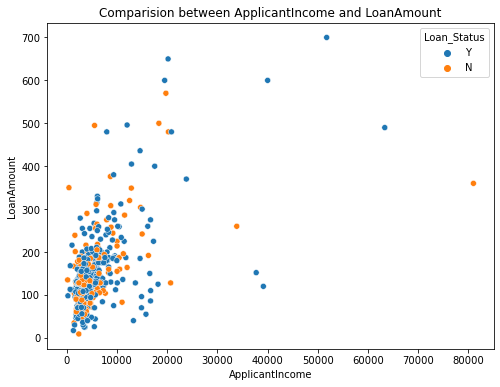

In [43]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between ApplicantIncome and LoanAmount')
sns.scatterplot(df['ApplicantIncome'],df['LoanAmount'],hue=df['Loan_Status']);

There is a high density of points in the range of 0-2000 for ApplicantIncome, and 0-300 for loan amount which means if Applicants income is in the range of 0-2000 then the loan amount will be approved in the range 0-300.

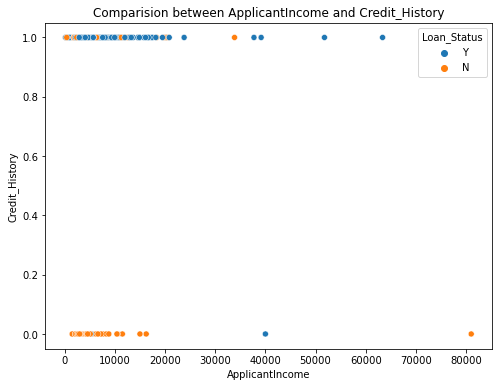

In [44]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between ApplicantIncome and Credit_History')
sns.scatterplot(df['ApplicantIncome'],df['Credit_History'],hue=df['Loan_Status']);

If the applicant has credit history 1 then thechance of getting loan approved is more irrespective of Applicant Income

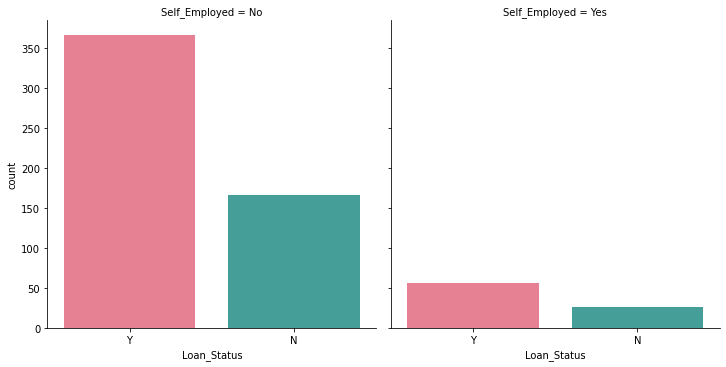

In [45]:
#Comparision between features using cat plot
sns.catplot(x='Loan_Status',col='Self_Employed',data=df,kind='count',palette="husl")

Applicants who are not self employed has more chance of getting loan approved.

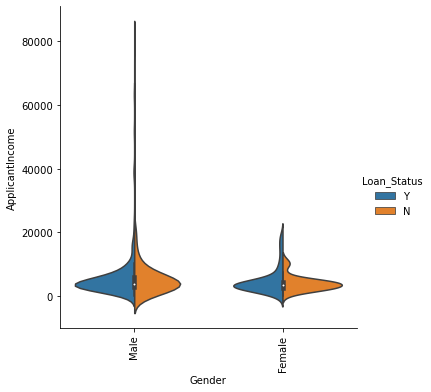

In [46]:
# Let's plot catplot for pair of features
sns.catplot(x = "Gender", y = "ApplicantIncome", hue = "Loan_Status", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

Male applicants has chance of getting loan approved.Irrespective of ApplicantIncome.

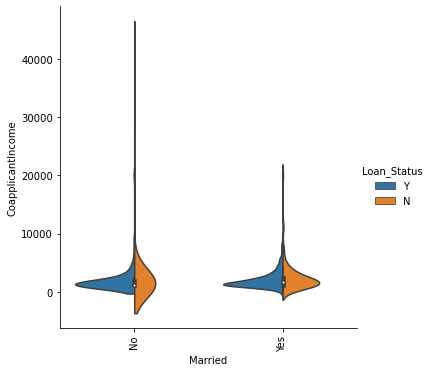

In [47]:
# Let's plot catplot for pair of features
sns.catplot(x = "Married", y = "CoapplicantIncome", hue = "Loan_Status", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

Married people has more chance of getting loan approved.

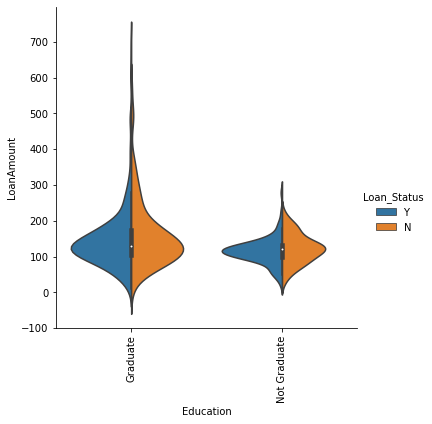

In [48]:
# Let's plot catplot for pair of features
sns.catplot(x = "Education", y = "LoanAmount", hue = "Loan_Status", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

Graduated people has more chance of getting loan approved.

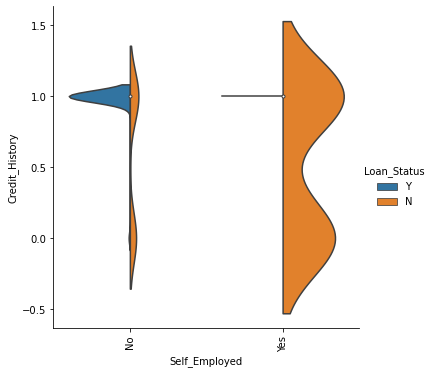

In [49]:
# Let's plot catplot for pair of features
sns.catplot(x = "Self_Employed", y = "Credit_History", hue = "Loan_Status", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

There is very less chance of getting loan approved for self employed applicants.

### Multivariate Analysis:

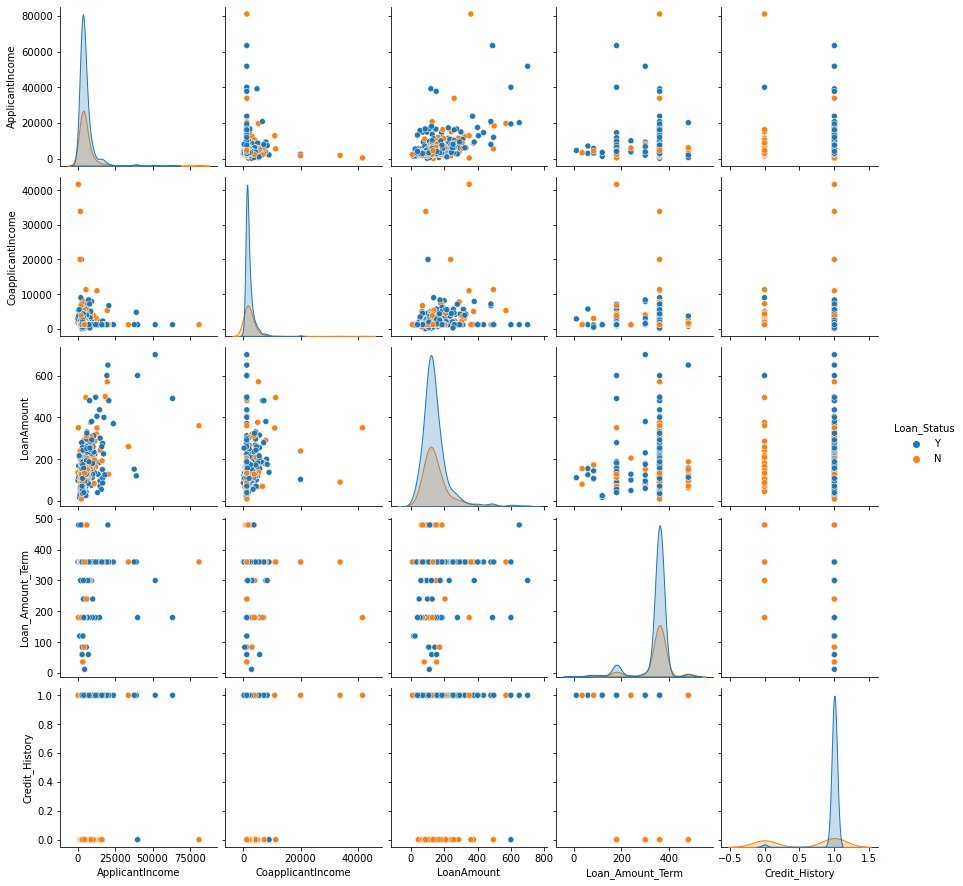

In [50]:
#pair ploting for df
sns.pairplot(df,hue="Loan_Status")

Above is the pair plot for having Laon_Status as target.There are some extreme outliers present in the dataset.

#### Data Cleaning

#### Checking for Outliers

<AxesSubplot:>

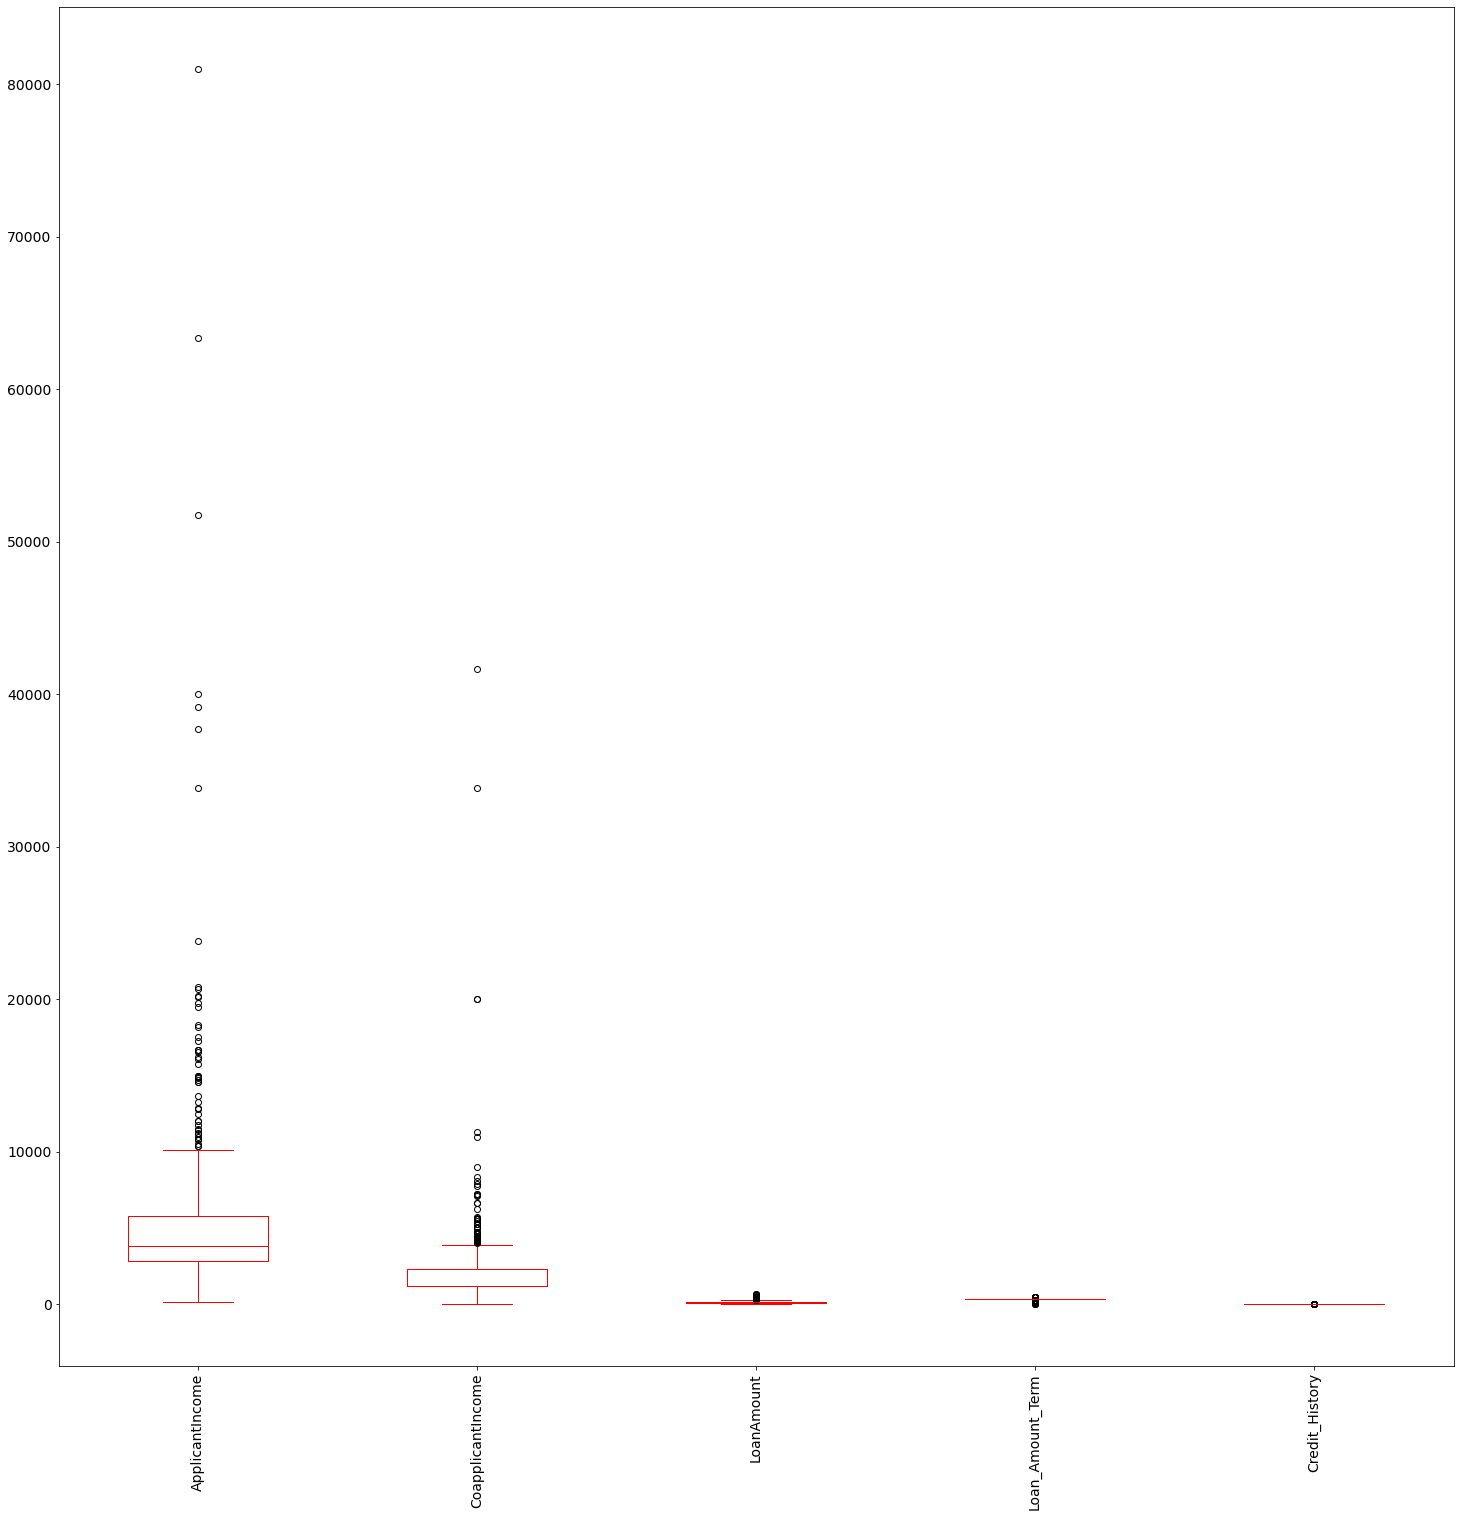

In [51]:
#Checking for outliers using boxplot
df.plot(rot = 90,kind='box',fontsize=14,figsize=(25,25),color='r')

Since Credit_History,Loan_Amount_Term is a Categorical column no need to remove outliers

#### Removing Outliers

In [52]:
# Z score method
#Features having outliers
features=df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]

In [53]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,1188.5,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,1188.5,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,1188.5,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,1188.5,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,1188.5,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,1188.5,187.0,360.0,1.0,Urban,Y


In [54]:
#Checking shape of new dataset
df_new.shape

(577, 12)

In [55]:
df.shape

(614, 12)

In [56]:
#Checking dataloss in zscore method
Dataloss = (((614-577)/614)*100)
Dataloss


6.026058631921824

Using Zscore i have 6.03% data loss.Which is less than 10%.But still let me have a look into IQR method also

In [57]:
# IQR Method

# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [58]:
df_1.shape

(434, 12)

In [59]:
df.shape

(614, 12)

In [60]:
#Checking dataloss in IQR
Dataloss = (((614-434)/614)*100)
Dataloss

29.31596091205212

There is a great dataloss in IQR method so let me stick on to zscore method to remove outliers.

#### Checking for Skewness

In [61]:
#Checking for skewness
df_new.skew()

ApplicantIncome      2.148522
CoapplicantIncome    2.326156
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

No need to remove skewness in Credit_History,Loan_Amount_Term since i'm considering it as categorical column.

#### Removing skewness using yeo-johnson method:

In [62]:
#Creating a list of skewed features
fea=["ApplicantIncome","CoapplicantIncome","LoanAmount"]

In [63]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

Using yeo_johnson method i have removing the skewness.

In [64]:
df_new[fea] = scaler.fit_transform(df_new[fea].values)

In [65]:
#Checking skewness again
df_new[fea].skew()

ApplicantIncome      0.027981
CoapplicantIncome    0.079601
LoanAmount           0.048425
dtype: float64

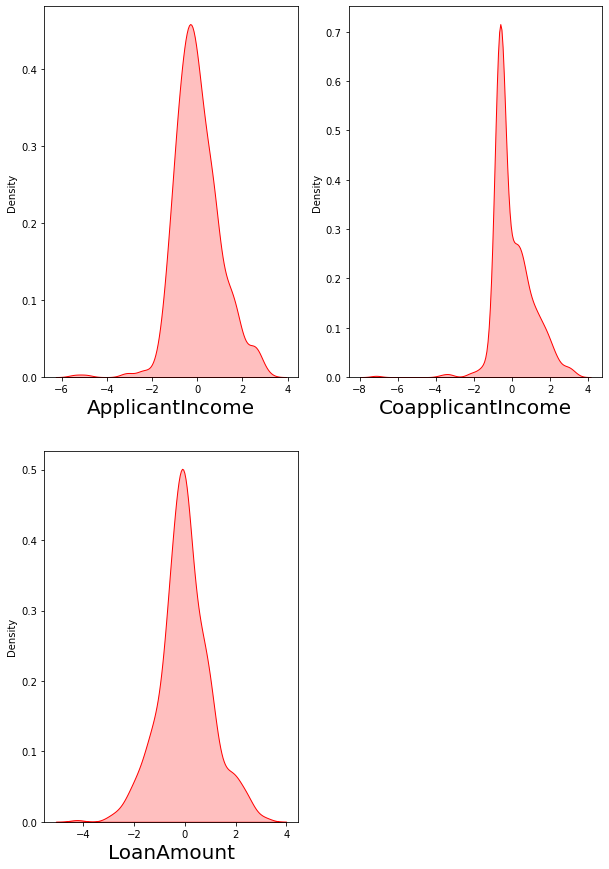

In [66]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(10,15), facecolor='white')
plotnumber = 1

for column in df_new[fea]:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df_new[column],color='r',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

#### Label Encoding

In [67]:
# Separating categorical columns in df_new
cat_col=[]
for i in df_new.dtypes.index:
    if df_new.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [68]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_new[cat_col]= df_new[cat_col].apply(LE.fit_transform)

In [69]:
df_new[cat_col].head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1


#### Correlation

In [70]:
cor=df_new.corr()

In [71]:
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.137334,0.172146,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.139109,0.181878,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,-0.066972,0.131772,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,-0.060180,-0.128715,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.012839,0.117218,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.185490,0.432154,-0.069429,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.137334,0.139109,-0.066972,-0.060180,-0.012839,-0.185490,1.000000,0.304356,-0.068870,-0.032656,-0.082216,0.000762
LoanAmount,0.172146,0.181878,0.131772,-0.128715,0.117218,0.432154,0.304356,1.000000,0.049057,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.069429,-0.068870,0.049057,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.028825,-0.032656,-0.003626,0.027392,1.000000,-0.008121,0.560936


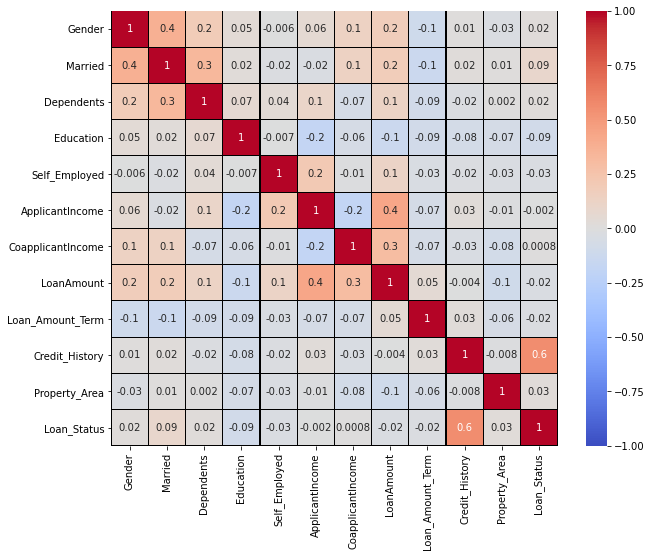

In [72]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(10,8))
sns.heatmap(df_new.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

There is no multicolinearity issue in this dataset.

I can notice that with target column ApplicantIncome and CoapplicantIncome is very less correlated.

Let me plot bar plot of target correlation to get better vission.

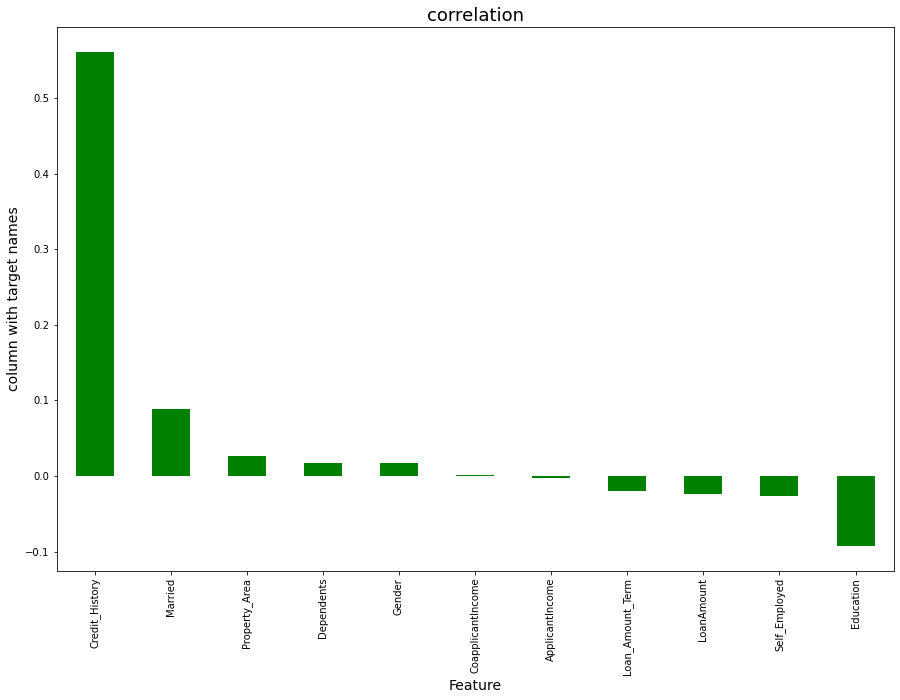

In [73]:
plt.figure(figsize=(15,10))
df_new.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [74]:
#Droping less correlated column
df_new = df_new.drop(["CoapplicantIncome"],axis=1)

#### seperating features and label

In [75]:
x = df_new.drop("Loan_Status",axis=1)
y = df_new["Loan_Status"]

#### Scaling the data

In [76]:
# Scaling the Data

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [77]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,0.681780,0.000771,360.0,1.0,2
1,1,1,1,0,0,0.234783,0.000771,360.0,1.0,0
2,1,1,0,0,1,-0.527201,-1.437336,360.0,1.0,2
3,1,1,0,1,0,-0.791972,-0.153545,360.0,1.0,2
4,1,0,0,0,0,0.728848,0.238260,360.0,1.0,2


#### Balancing the Target variable using OverSampling

In [78]:
#Checking the value count of target column
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [79]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X, y = SM.fit_resample(X,y)

In [80]:
# Checking the value counts again
y.value_counts()

0    398
1    398
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

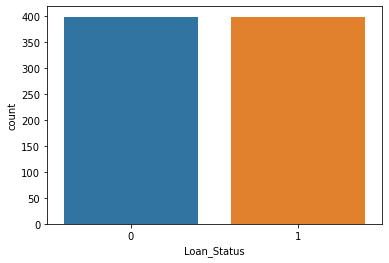

In [81]:
# Visualizing the data after oversampling
sns.countplot(y)

#### Finding Best Random State and Accuracy

In [82]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [83]:
from sklearn.ensemble import RandomForestClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestClassifier()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8661087866108786  on Random_state  6


In [84]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

#### Classification Algorithms

In [87]:
#importing necessary libraries.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

1. Decision Tree Classifier

In [88]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,y_train)
preddt=DTC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, preddt))
print('Confusion Matrix:',confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))

Accuracy Score: 0.7364016736401674
Confusion Matrix: [[87 23]
 [40 89]]
              precision    recall  f1-score   support

           0       0.69      0.79      0.73       110
           1       0.79      0.69      0.74       129

    accuracy                           0.74       239
   macro avg       0.74      0.74      0.74       239
weighted avg       0.74      0.74      0.74       239



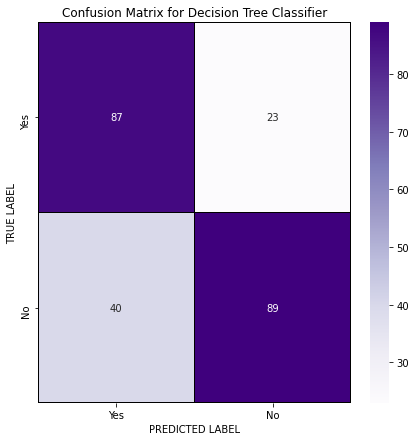

In [89]:
cm = confusion_matrix(y_test, preddt)

x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

2. Random Forest Classifier

In [90]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
predrf=RFC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predrf))
print('Confusion Matrix:',confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

Accuracy Score: 0.8410041841004184
Confusion Matrix: [[ 89  21]
 [ 17 112]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       110
           1       0.84      0.87      0.85       129

    accuracy                           0.84       239
   macro avg       0.84      0.84      0.84       239
weighted avg       0.84      0.84      0.84       239



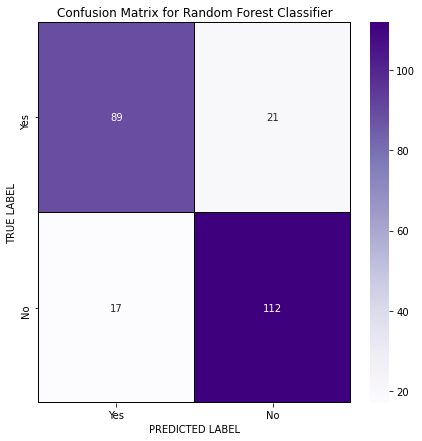

In [91]:
cm = confusion_matrix(y_test, predrf)

x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

3. SVC

In [93]:
SV=SVC()
SV.fit(X_train,y_train)
predsv=SV.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predsv))
print('Confusion Matrix:',confusion_matrix(y_test, predsv))
print(classification_report(y_test,predsv))

Accuracy Score: 0.7071129707112971
Confusion Matrix: [[ 58  52]
 [ 18 111]]
              precision    recall  f1-score   support

           0       0.76      0.53      0.62       110
           1       0.68      0.86      0.76       129

    accuracy                           0.71       239
   macro avg       0.72      0.69      0.69       239
weighted avg       0.72      0.71      0.70       239



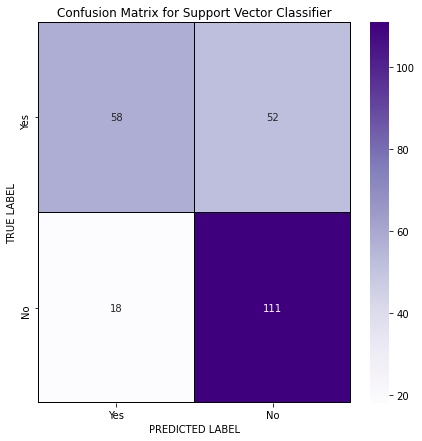

In [94]:
cm = confusion_matrix(y_test, predsv)

x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Classifier')
plt.show()

4. KNeighbor Classifier

In [95]:
knn=KNN()
knn.fit(X_train,y_train)
predkn=knn.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predkn))
print('Confusion Matrix:',confusion_matrix(y_test, predkn))
print(classification_report(y_test,predkn))

Accuracy Score: 0.7112970711297071
Confusion Matrix: [[78 32]
 [37 92]]
              precision    recall  f1-score   support

           0       0.68      0.71      0.69       110
           1       0.74      0.71      0.73       129

    accuracy                           0.71       239
   macro avg       0.71      0.71      0.71       239
weighted avg       0.71      0.71      0.71       239



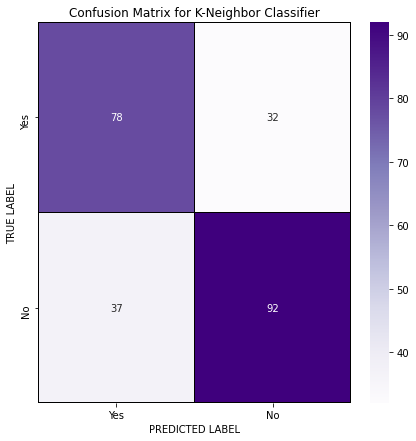

In [96]:
cm = confusion_matrix(y_test, predkn)

x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for K-Neighbor Classifier')
plt.show()

5. Gradient Boosting Classifier

In [97]:
GBC=GradientBoostingClassifier()
GBC.fit(X_train,y_train)
predgb=GBC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predgb))
print('Confusion Matrix:',confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

Accuracy Score: 0.799163179916318
Confusion Matrix: [[ 82  28]
 [ 20 109]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       110
           1       0.80      0.84      0.82       129

    accuracy                           0.80       239
   macro avg       0.80      0.80      0.80       239
weighted avg       0.80      0.80      0.80       239



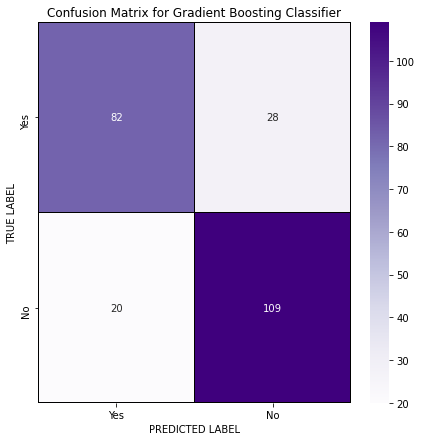

In [98]:
cm = confusion_matrix(y_test, predgb)

x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

6. XGB Classifier

In [99]:
XGB=XGBClassifier()
XGB.fit(X_train,y_train)
predxg=XGB.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predxg))
print('Confusion Matrix:',confusion_matrix(y_test, predxg))
print(classification_report(y_test,predxg))

[19:31:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.7447698744769874
Confusion Matrix: [[90 20]
 [41 88]]
              precision    recall  f1-score   support

           0       0.69      0.82      0.75       110
           1       0.81      0.68      0.74       129

    accuracy                           0.74       239
   macro avg       0.75      0.75      0.74       239
weighted avg       0.76      0.74      0.74       239



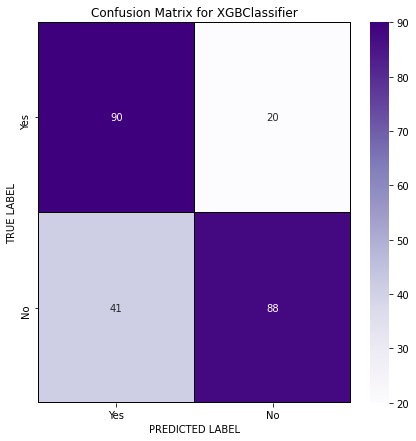

In [100]:
cm = confusion_matrix(y_test, predxg)

x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for XGBClassifier')
plt.show()

#### Cross Validation Score

In [101]:
#Importing library
from sklearn.model_selection import cross_val_score

In [102]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,X,y,cv=5).mean())

# cv score for Random Forest Classifier
print(cross_val_score(RFC,X,y,cv=5).mean())

# cv score for Support Vector Classifier
print(cross_val_score(SV,X,y,cv=5).mean())

# cv score for KNN Classifier
print(cross_val_score(knn,X,y,cv=5).mean())

# cv score for Gradient Boosting Classifier
print(cross_val_score(GBC,X,y,cv=5).mean())

# cv score for XGB Classifier
print(cross_val_score(XGB,X,y,cv=5).mean())

0.7613522012578616
0.8103537735849058
0.7274135220125786
0.7324135220125786
0.7890566037735848
[19:31:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:31:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:31:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to r

Above are the cross validation scores of DTC,RFC,SVC,KNN,GBC and XGB.

By looking into the difference of model accuracy and cross validation score i found the least difference in RFC.So RFC is my best model.

#### Hyper Parameter Tuning

In [104]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

parameter = {'criterion':['gini','entropy'],
             'max_depth': [10,15,20,25],
             'n_estimators':[100,200,300,400],
             'max_features': ["auto","sqrt","log2"]}
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400]})

In [105]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 100}

In [106]:
Final_mod=RandomForestClassifier(criterion='gini',max_depth=10, max_features='auto', n_estimators=100)
Final_mod.fit(X_train,y_train)
pred=Final_mod.predict(X_test)
acc=accuracy_score(y_test, pred)

print(acc*100)

82.84518828451883


In [107]:
print('Accuracy Score:',accuracy_score(y_test,pred))
print('Confusion matrix:',confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score: 0.8284518828451883
Confusion matrix: [[ 85  25]
 [ 16 113]]
              precision    recall  f1-score   support

           0       0.84      0.77      0.81       110
           1       0.82      0.88      0.85       129

    accuracy                           0.83       239
   macro avg       0.83      0.82      0.83       239
weighted avg       0.83      0.83      0.83       239



After tuning the accuracy is  83% it looks good!!!!!

#### ROC-AUC Curve

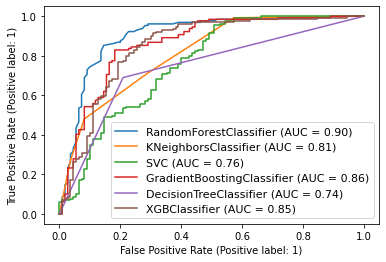

In [108]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 
disp = plot_roc_curve(RFC,X_test,y_test)
plot_roc_curve(knn, X_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
plot_roc_curve(SV, X_test, y_test, ax=disp.ax_)
plot_roc_curve(GBC, X_test, y_test, ax=disp.ax_)
plot_roc_curve(DTC, X_test, y_test, ax=disp.ax_)
plot_roc_curve(XGB, X_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

#### Saving the Model

In [109]:
#Saving the model as .pkl file
import joblib
joblib.dump(Final_mod,"LoanPrediction.pkl")

['LoanPrediction.pkl']

#### Predictions

In [110]:
# Loading the saved model
model=joblib.load("LoanPrediction.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [111]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,229,230,231,232,233,234,235,236,237,238
Predicted,1,1,1,0,1,0,0,0,1,1,...,1,1,1,0,0,1,1,1,1,1
Actual,1,0,1,0,0,0,0,0,1,1,...,1,1,1,0,0,1,1,0,1,1


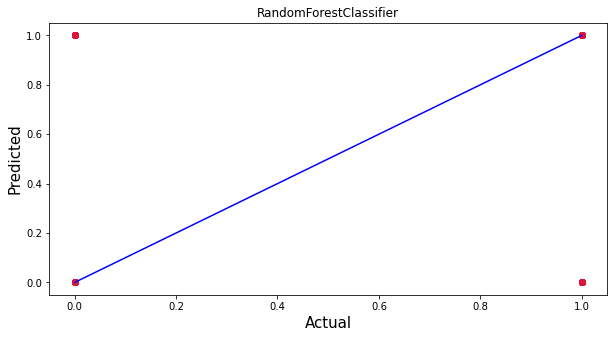

In [112]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("RandomForestClassifier")
plt.show()